In [1]:
#importing the necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("churn.csv")
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Question One : Demographic

## Part A

In [4]:
#creating a new df of customers who did not churn
df_retained = df.loc[(df['Churn']) == "No"]
df_retained.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [5]:
df_retained["Dependents"].value_counts()

No     3390
Yes    1784
Name: Dependents, dtype: int64

In [6]:
nDep = 3390/(3390+1784)
nDep

0.6551990722844995

In [7]:
df_retained["SeniorCitizen"].value_counts()

0    4508
1     666
Name: SeniorCitizen, dtype: int64

In [8]:
nSen = 4508/(4508+666)
nSen

0.8712794742945497

In [9]:
df_retained["gender"].value_counts()


Male      2625
Female    2549
Name: gender, dtype: int64

In [10]:
df_retained["Partner"].value_counts()


Yes    2733
No     2441
Name: Partner, dtype: int64

## Answer to Part A

Considering the demographics of the people who did not churn (were retained):

- In terms of dependents majority of those who did not churn were people with no dependents (66%) . 
- In terms of age (Senior Citizen) majority of those who did not churn were non-Senior citizens (87%) 
- In terms of gender there appears to be a 50/50 split so not a good demographic for judging customer retention 
- In terms of whether one has a partner or not there appears to be a 50/50 split so not a good demographic for judging customer retention

Therefore the most popular demographics with the brand appear to be family status (those with non dependents) and age  (non Senior Citizens)

# Part B


In [11]:
#creating a new df of customers who did not churn
df_retained = df.loc[(df['Churn']) == "No"]
df_retained.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [12]:
print (df_retained["Dependents"].value_counts())
pd.crosstab(df['Dependents'],df['Churn'], margins = True, margins_name = "Total")



No     3390
Yes    1784
Name: Dependents, dtype: int64


Churn,No,Yes,Total
Dependents,,,
No,3390,1543,4933
Yes,1784,326,2110
Total,5174,1869,7043


In [13]:
print (df_retained["Partner"].value_counts())
pd.crosstab(df['Partner'],df['Churn'], margins = True, margins_name = "Total")


Yes    2733
No     2441
Name: Partner, dtype: int64


Churn,No,Yes,Total
Partner,,,
No,2441,1200,3641
Yes,2733,669,3402
Total,5174,1869,7043


In [14]:
print (df_retained["SeniorCitizen"].value_counts())
pd.crosstab(df['SeniorCitizen'],df['Churn'], margins = True, margins_name = "Total")

0    4508
1     666
Name: SeniorCitizen, dtype: int64


Churn,No,Yes,Total
SeniorCitizen,,,
0,4508,1393,5901
1,666,476,1142
Total,5174,1869,7043


## Answer to part B 

Considering the demographics of the people who did not churn :
- In terms of dependents majority of those who did not churn were those with no dependents
- In terms of marriage status (Partner) majority of the non-churners were those who had a partner 
- In terms of age (Senior Citizen) majority of those who did not churn were not listed as Senior Citizens 

So if the marketing team wanted to increase customer retention they would focus their advertisements on these people. 



# Question 2 : Services


# Part A

## Telco Services Analysis

In [15]:
#viewing a list of all the services 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

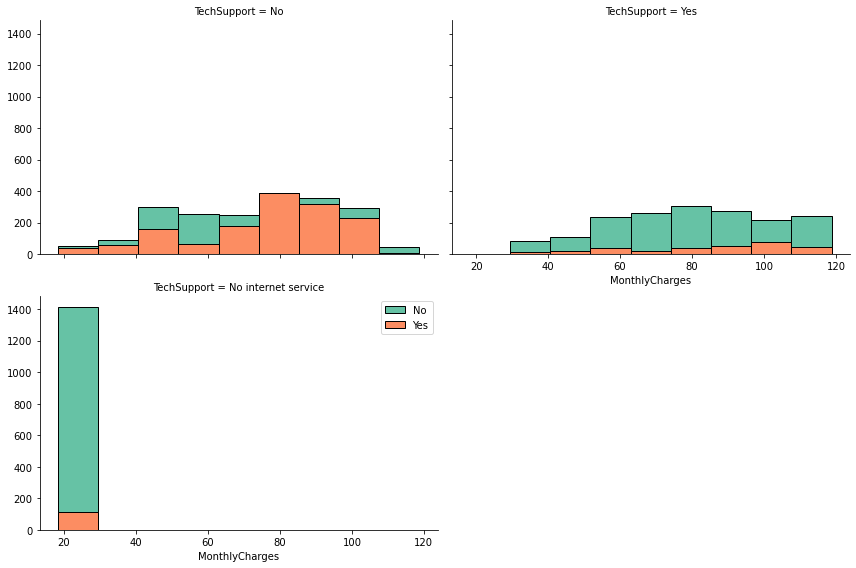

In [16]:
#Tech Support
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="TechSupport", hue="Churn", palette="Set2", col_wrap=2, height = 4 , aspect =1.5)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

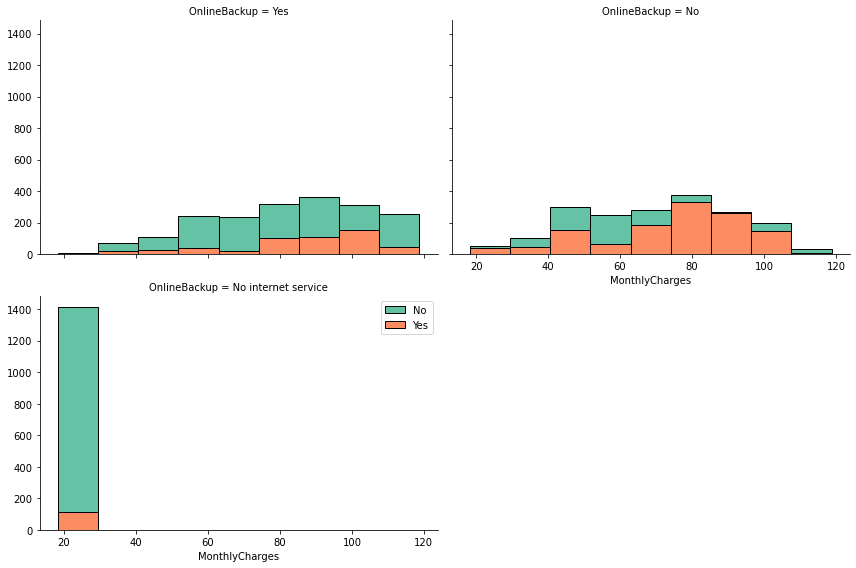

In [17]:
#Online Backup
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="OnlineBackup", hue="Churn", palette="Set2", col_wrap=2, height = 4 , aspect =1.5)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

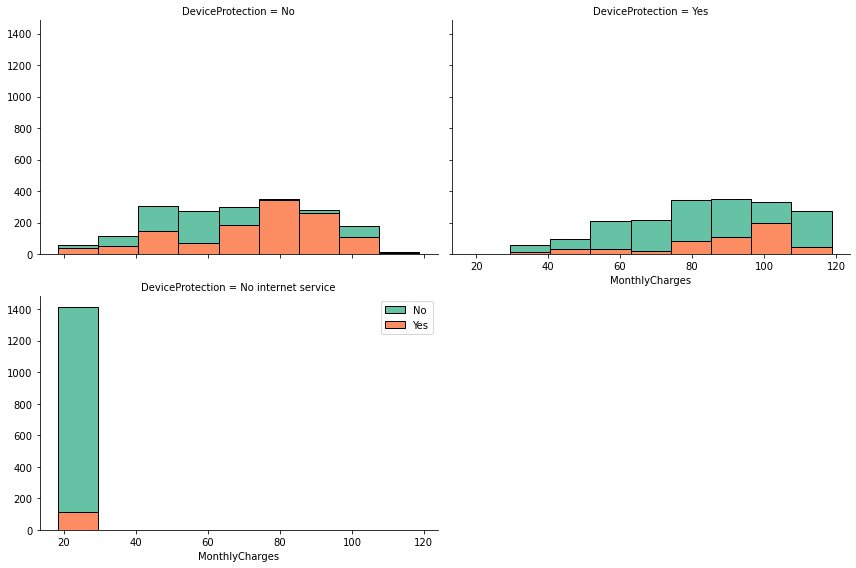

In [42]:
#Device Protection
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="DeviceProtection", hue="Churn", palette="Set2", col_wrap=2, height = 4 , aspect =1.5)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

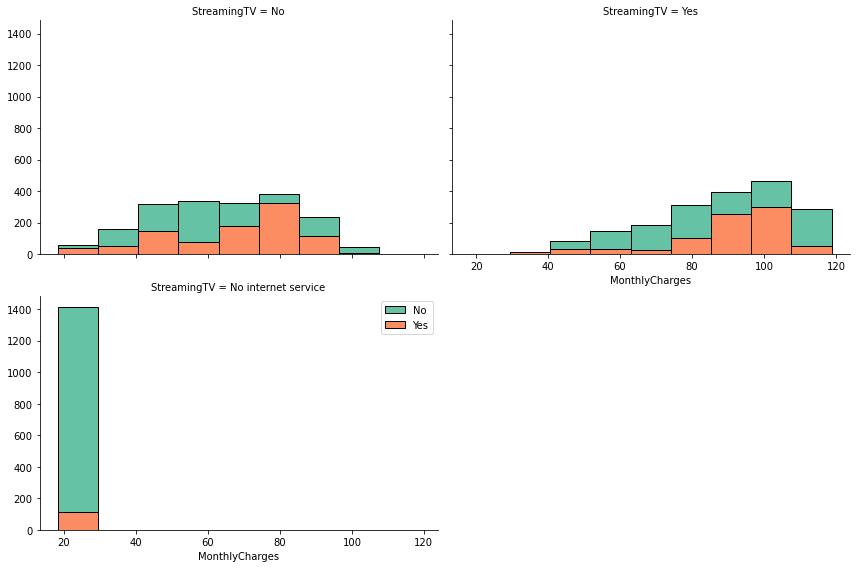

In [34]:
#Streaming TV service 
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="StreamingTV", hue="Churn", palette="Set2", col_wrap=2, height = 4 , aspect =1.5)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

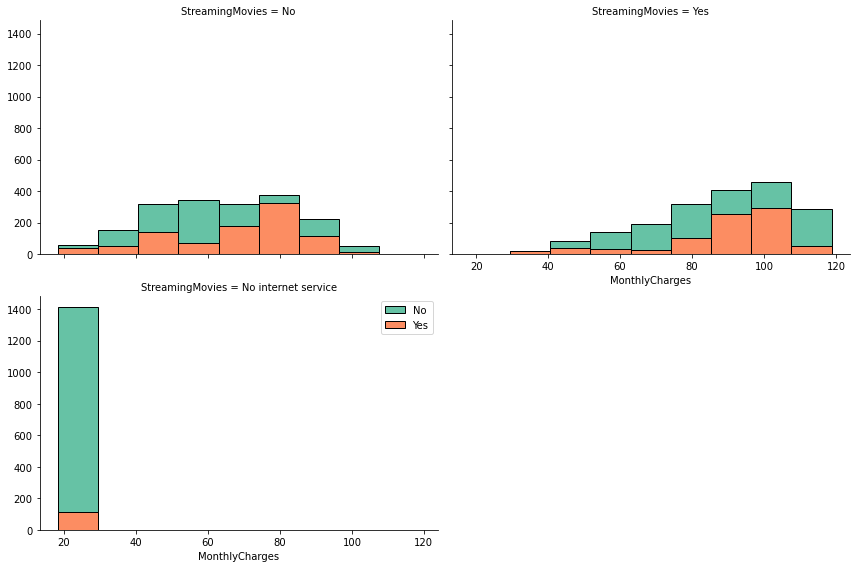

In [40]:
#Streaming Movie service 
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="StreamingMovies", hue="Churn", palette="Set2", col_wrap=2, height = 4 , aspect =1.5)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

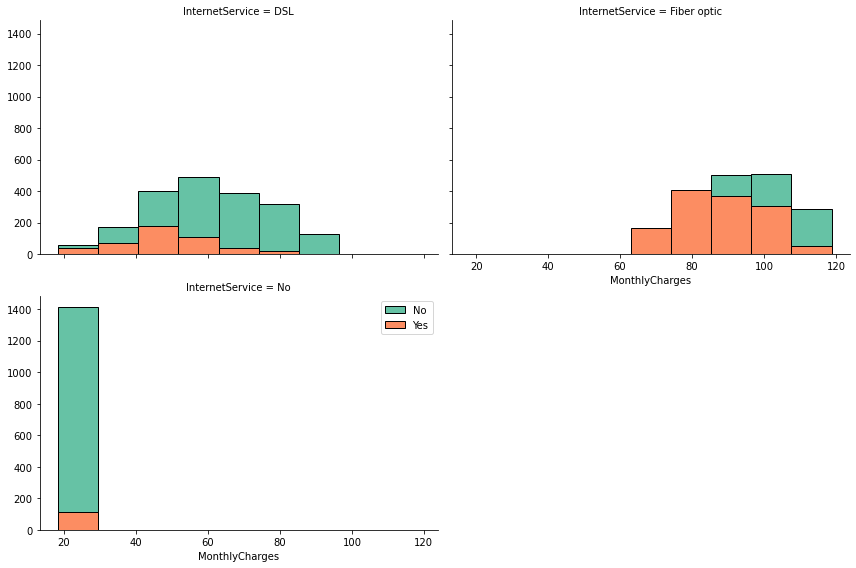

In [35]:
#Internet service
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="InternetService", hue="Churn", palette="Set2", col_wrap=2, height = 4 , aspect =1.5)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

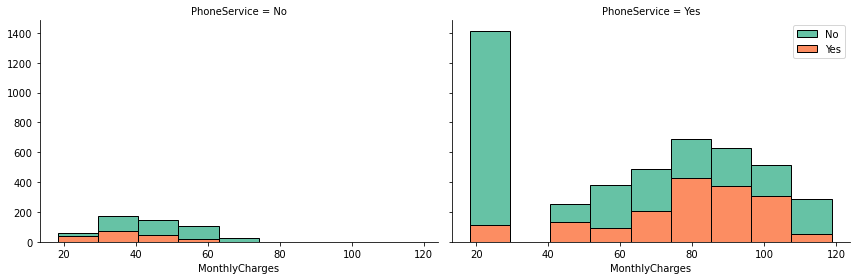

In [37]:
#Phone service 
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="PhoneService", hue="Churn", palette="Set2", col_wrap=2, height = 4 , aspect =1.5)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

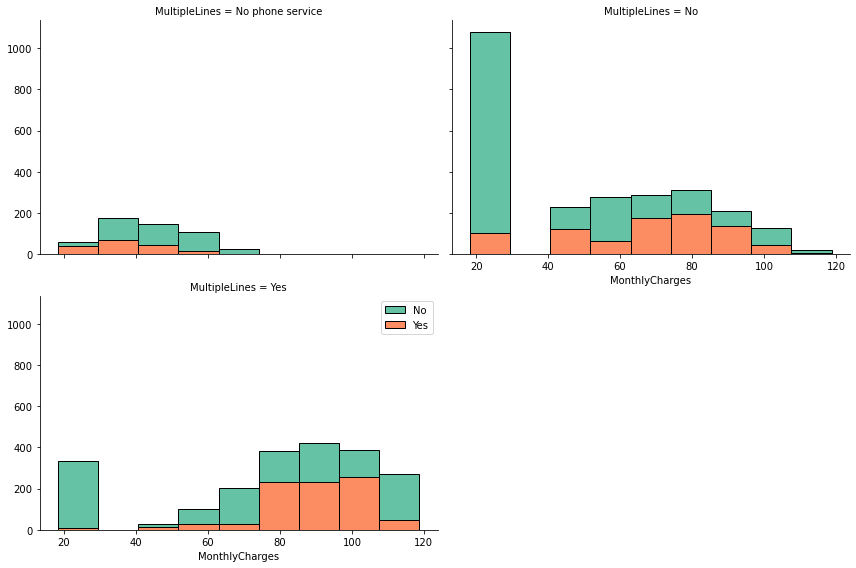

In [38]:
#Multiple Lines
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="MultipleLines", hue="Churn", palette="Set2", col_wrap=2, height = 4 , aspect =1.5)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

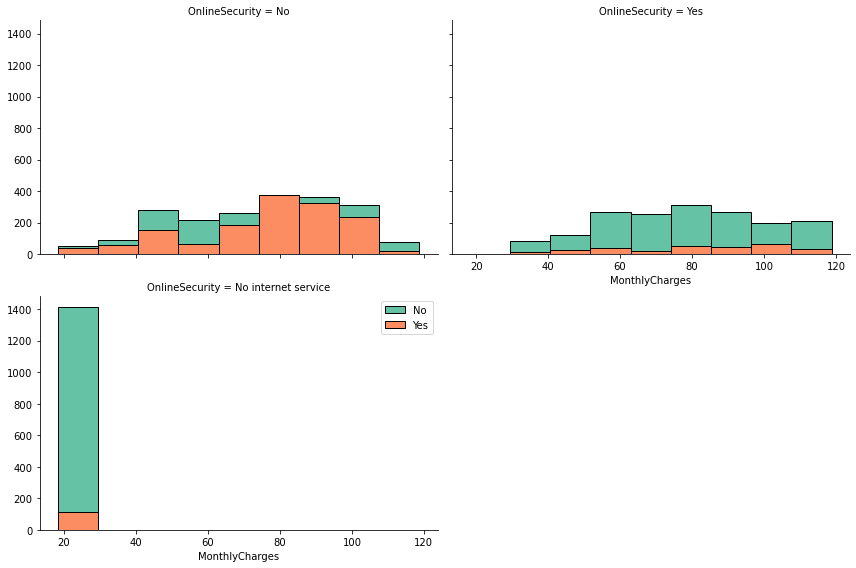

In [39]:
#Online Security
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="OnlineSecurity", hue="Churn", palette="Set2", col_wrap=2, height = 4 , aspect =1.5)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Answer to Part A

From the Facet Grids above the following services contribute to higher monthly charges and have caused more customers to churn : 

- Phone service 
- Internet service : fibre optic
- Multiple Lines 


# Part B

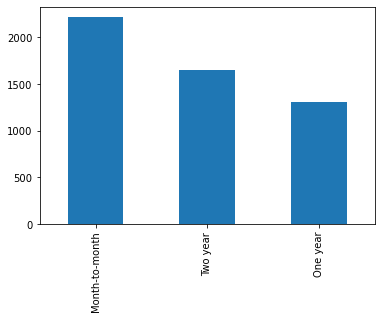

In [55]:
#Constructing a bar plot to see categorical distribution of Phone Service contracts from the retained customers data frame 
df_retained['Contract'].value_counts().plot(kind="bar")

## Answer to Part B 

From the bar graph above it appears that the Month to Month contracts have the highest number of subscribers. If the company was to offer the Phone service as stand alone these are the contracts they should focus on to encourage customer retention.

# Quetsion 3 : Payment

# Part A

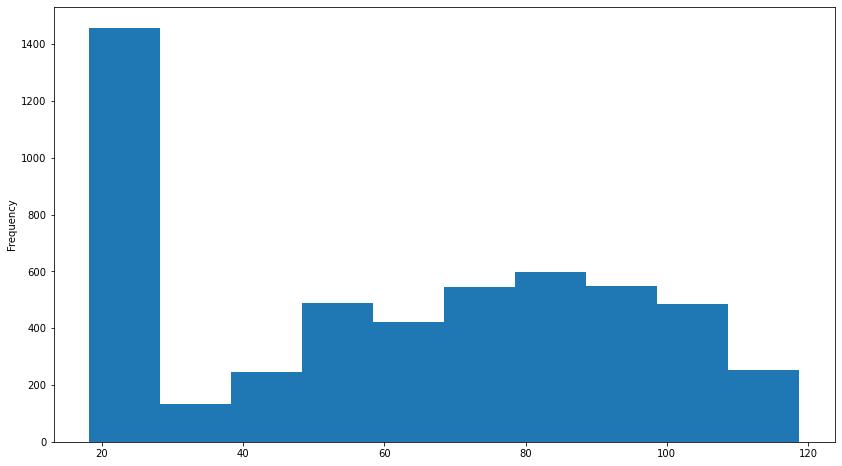

In [18]:
#histogram of monthly charges to see distribution 
df_retained["MonthlyCharges"].plot(kind='hist', bins = 10, x="MonthlyCharges", figsize=(14,8))

In [20]:
basic = (20 + 33.3)/2

basic

26.65

In [25]:
plus = (53.3 + 86.3)/2 
plus


69.8

In [26]:
premium = (86.3+120)/2
premium

103.15

## Answer to Part A 


From the histogram above the charges seem to be concentrated between the range of 20 - 120 per month . The appropriate monthly price for each bouquet to keep customers from churning would be : 
- Basic : 26.65 
- Plus : 69.8
- Premium : 103.15


# Part B

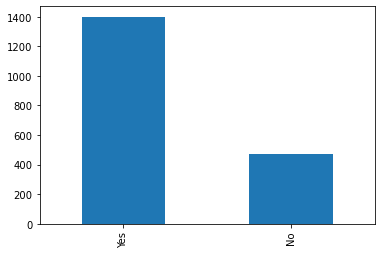

In [61]:
df_churn['PaperlessBilling'].value_counts().plot(kind="bar")

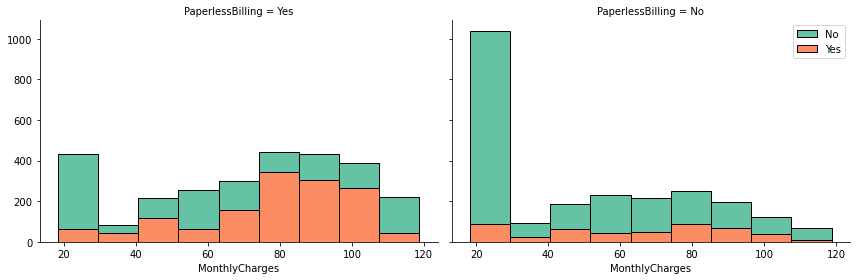

In [56]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="PaperlessBilling", hue="Churn", palette="Set2", col_wrap=2, height = 4 , aspect =1.5)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Answer to Part B 

From the FacetGrids above it appears that non paperless billing (no) has a much higher retention rate than paperless billing (yes) overall. I would advise the company not to go strictly paperless as this move would most likely decrease the customer retention given the data